## PROSPERLOAN DATASET EXPLORATION
## by Josephine Seyram Agyeman

## Introduction

This document explores a dataset containing various variables like term, recommendations, investors, original loan amount, occcupation, among others on approximately 110,000 loan borrowers.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading dataset into pandas dataframe 
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#Getting familiar with the dataset 
print(loan.shape)

(113937, 81)


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
print(loan.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


There are 81 columns and not all will be explored

In [8]:
#Selecting columns that will be explored

loan = loan.loc[:, ['Term', 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount',  
                 'Recommendations', 'MonthlyLoanPayment', 'Investors']]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
Term                  113937 non-null int64
LoanStatus            113937 non-null object
BorrowerState         108422 non-null object
Occupation            110349 non-null object
EmploymentStatus      111682 non-null object
LoanOriginalAmount    113937 non-null int64
Recommendations       113937 non-null int64
MonthlyLoanPayment    113937 non-null float64
Investors             113937 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 7.8+ MB


In [9]:
def tocategorical(column):
    """Convert to categorical"""
    loan[column] = loan[column].astype('category') 

In [10]:
#Changing the data types of some columns to catergories

tocategorical('Occupation')
tocategorical('BorrowerState')
tocategorical('LoanStatus')
tocategorical('EmploymentStatus')
tocategorical('Term')
tocategorical('Recommendations')
tocategorical('Investors')

In [11]:
loan['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [12]:
print(loan.shape)

(113937, 9)


In [13]:
print(loan.dtypes)

Term                  category
LoanStatus            category
BorrowerState         category
Occupation            category
EmploymentStatus      category
LoanOriginalAmount       int64
Recommendations       category
MonthlyLoanPayment     float64
Investors             category
dtype: object


### What is the structure of your dataset?

The dataset is made up of 113937 rows and 9 columns. Most of the variables are categoric. The LoanOriginalAmount and MonthlyLoanPayment are the only numeric variables.

### What is/are the main feature(s) of interest in your dataset?

I’m interested in figuring out which features are best for recieving a huge loan original amount in the dataset. I am particulary interested the Term, Original Loan Amount, Recommendations, Employment Status, Investors and any other variable that might be of importance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


I expect that Employment Status and Recommendations will have the strongest effect on each loan amount: the higher number of recommendations a person has, the higher loan amount they receive. Also, people working will receive higher loans. I think the Term and Investors will also have an effect on the loan amount.

## Univariate Exploration
Taking note of the main variable, loan original amount

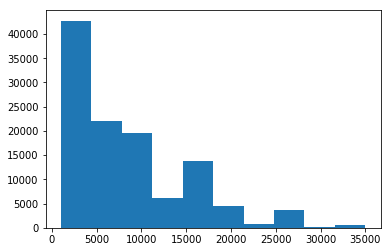

In [14]:
#Plotting loan original amount using a hist graph
plt.hist(data = loan, x= 'LoanOriginalAmount');

The graph has a long tail. Plotting it on a log scale to see it clearer

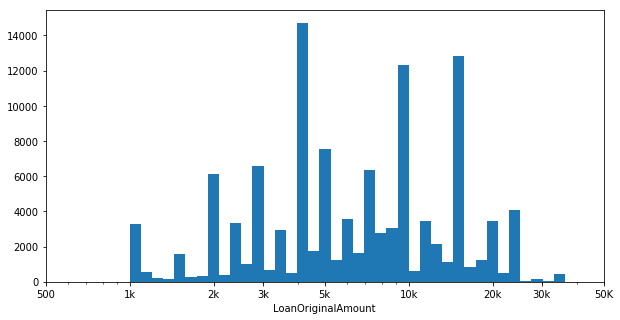

In [15]:
log_binsize = 0.040
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('LoanOriginalAmount')
plt.show()

The graph looks multimodal on the log scale with a number of peaks. The first significiant one between 3,000 and 5,000 and the second one just before 10,000. The third peak is between 10,000 and 20,000

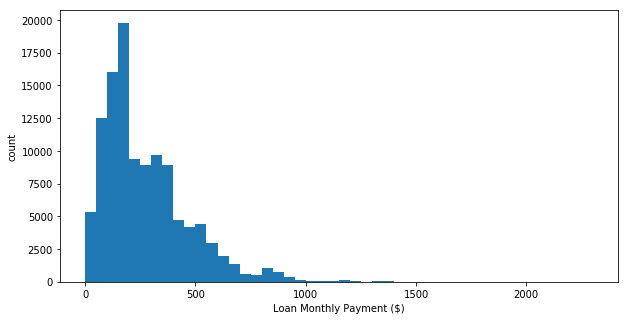

In [16]:
#Plotting MonthlyLoanPayment
binsize = 50
bins = np.arange(0, loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('count')
plt.show()


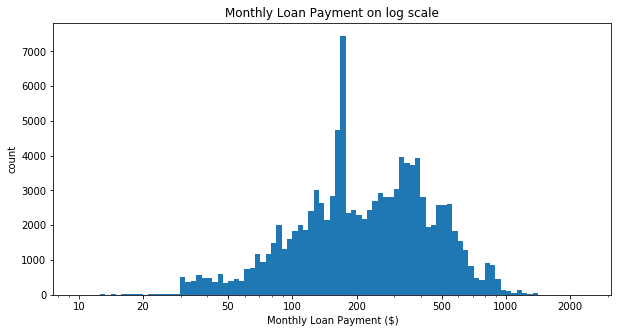

In [17]:
#Plotting MonthlyLoanPayemnt on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

The log scale graph of Monthly Loan Payment has the highest peak between 100 and 200 ($)

In [18]:
def myCountPlot (df, xVar, color=sb.color_palette()[0],order=None, figsize=[14, 6]):
    """Create a count plot"""
    plt.figure(figsize=figsize)
    sb.countplot(data=df,x=xVar,edgecolor= 'black' ,color=color, order=order);

Plotting graphs for other variables of interest
Employment Status, Investors, Term, Recommendations, Occupation, Borrower State, Loan Status)


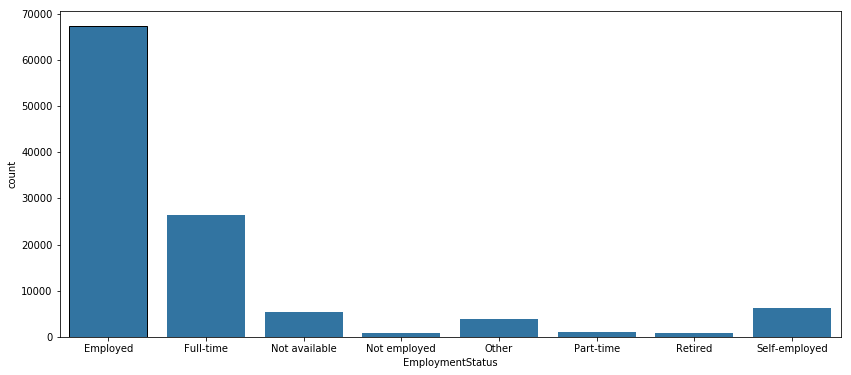

In [19]:
myCountPlot(loan,'EmploymentStatus')

From the bar plot, most borrowers are employed

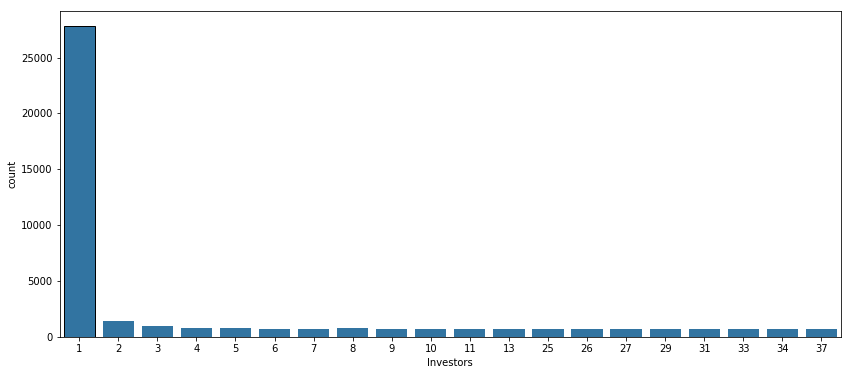

In [20]:
investor_order=investors = loan['Investors'].value_counts().head(20).sort_index().index
myCountPlot(loan, 'Investors', order=investor_order)

From the bar graph above, the first 20 loans were funded by one investor


In [21]:
#Term Graph
loan['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

The Terms for the loans were 12, 36 and 60 months.

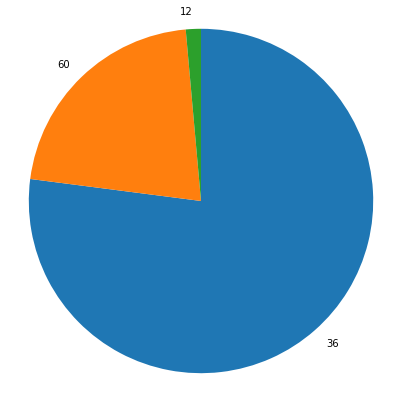

In [22]:
plt.figure(figsize=[7,7])
sorted_counts = loan['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90, counterclock=False)
plt.axis('square');

Most of the loans given out were for the 36 months term

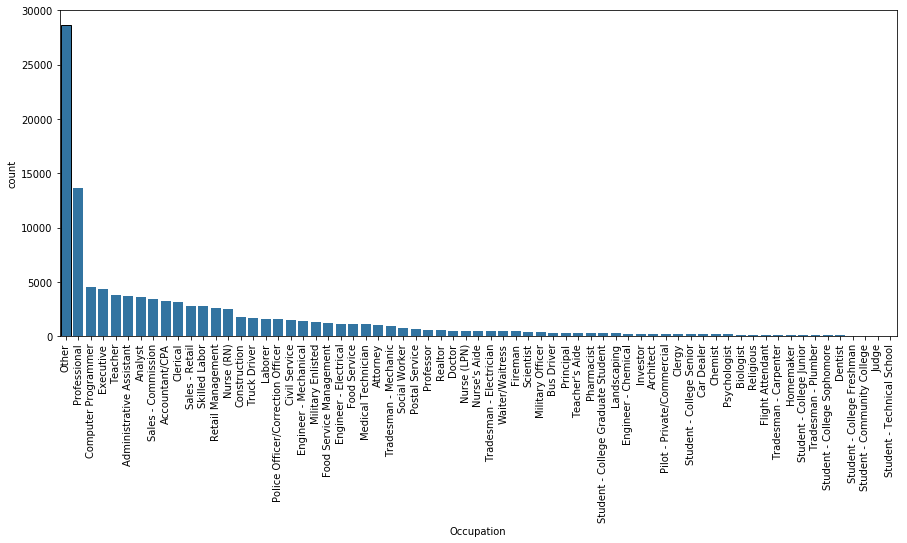

In [23]:
occupation_order = loan['Occupation'].value_counts().index
myCountPlot(loan, 'Occupation', order=occupation_order, figsize=[15,6])
plt.xticks(rotation=90);

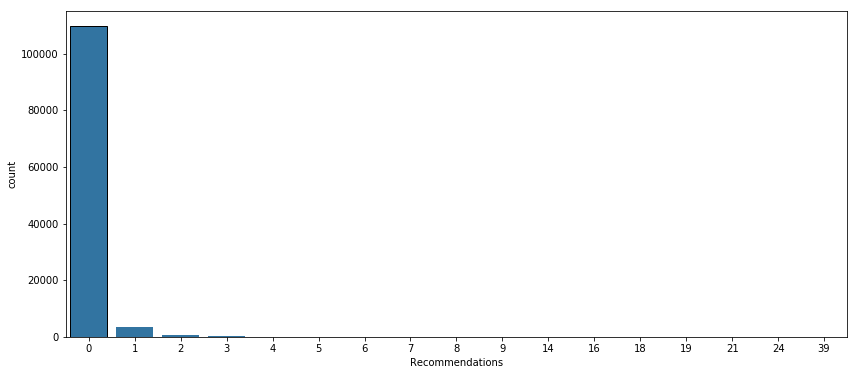

In [24]:
myCountPlot(loan,'Recommendations')

Most of the loans given out had no Recommendations

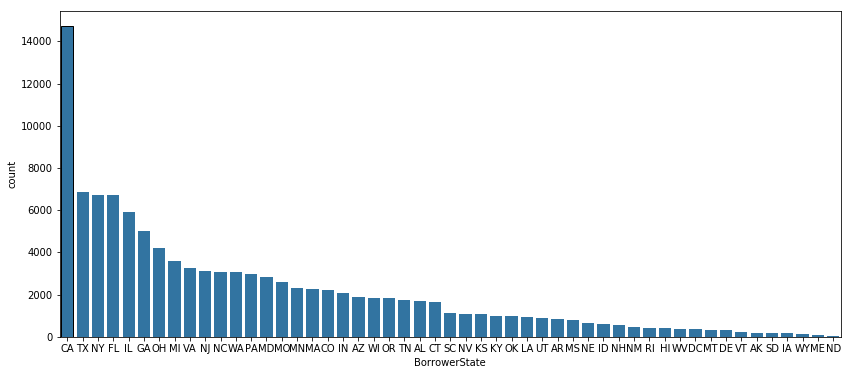

In [25]:
BState_order = loan['BorrowerState'].value_counts().index
myCountPlot(loan,'BorrowerState',order=BState_order)

Califorina (CA) is the state that had most borrowers. It is followed by Texas (TX) and New York (NY). With North Dakota (ND) as the state with the least borrowers

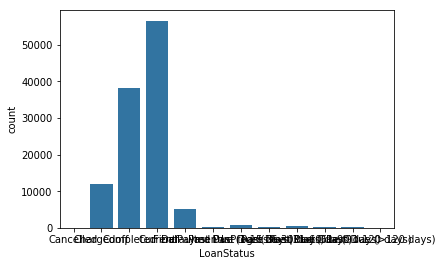

In [26]:
#Loan Status
base_color=sb.color_palette()[0]
sb.countplot(data=loan, x='LoanStatus', color=base_color);
plt.xticks(rotation=0);


#status_order=['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30)', 'Past Due (31-60)', 'Past Due (61-90)', 'Past Due (91-120)', 'Past Due (>120)', 'Chargedoff', 'Defaulted', 'Cancelled']

#loan['LoanStatus'] = pd.Categorical(loan['LoanStatus'], status_order, ordered=True)

In [27]:
#loan['LoanStatus'].value_counts().sort_index().plot.barh(edgecolor='black',figsize=[14, 6],rot=0,width=0.8);

Most of the loan are current (in existence)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanOriginalAmount variable had a long tail when plotted on a histogram chart. It was then plotted on a log scale and had three significant peaks. The first significiant one between 3,000 and 5,000 and the second one just before 10,000. The third peak is between 10,000 and 20,000

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the variables investigated looked like int datatype from the onset but are actually categories so they were changed using the .astype function. The MonthlyLoanPayment variable had a long tail; it was plotted on a log scale to get a clearer view

## Bivariate Exploration

Two variables will be plotted against each other and conclusions will be drawn

In [28]:
#Findng the mean of the LoanOriginalAmount and the number of Recommendations
data = loan[['Recommendations','LoanOriginalAmount']]
data = data.groupby('Recommendations')['LoanOriginalAmount'].mean()
data

Recommendations
0      8383.879073
1      6969.317975
2      7912.802817
3      6762.370370
4      9194.038462
5      7536.428571
6      5025.000000
7      9466.600000
8     14000.000000
9     10830.000000
14    24000.000000
16     6750.000000
18     2430.000000
19     2000.000000
21    25000.000000
24    25000.000000
39    25000.000000
Name: LoanOriginalAmount, dtype: float64

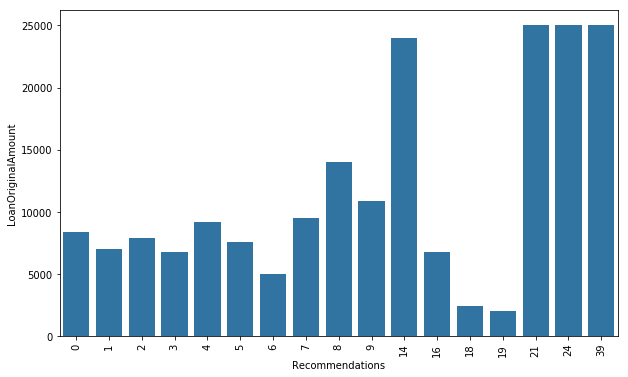

In [29]:
#Plotting Recommendations against LoanOriginalAmount
plt.figure(figsize = [10, 6])
sb.barplot(data=loan,x='Recommendations',y='LoanOriginalAmount',color=base_color,errwidth=False);
plt.xticks(rotation=90);

 On the average, borrowers with 21, 24 and 39 recommenders had the highest loan amount which was around 25,000. Those with 14 recommenders were closely behind; receiving approximately more than 24,000

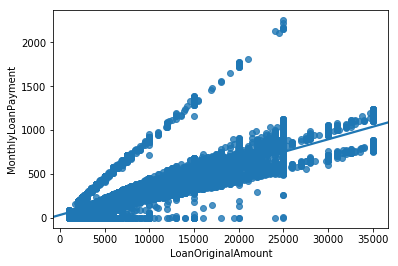

In [31]:
#LoanOriginalAmount vs MonthlyLoanPayment
sb.regplot(data=loan, x='LoanOriginalAmount', y='MonthlyLoanPayment');

The points are overlapping. Let's use jitter and transparency to get a good view

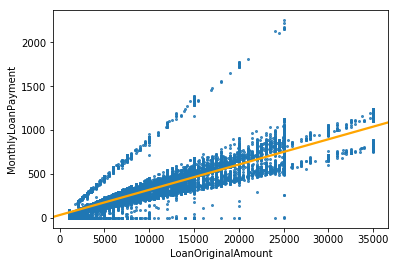

In [32]:
sb.regplot(data=loan, x='LoanOriginalAmount', y='MonthlyLoanPayment', scatter_kws={'s':4}, line_kws={'color':'orange'});

The scatter plot shows a positive correlation between LoanOriginalAmount and MonthlyLoanAmount

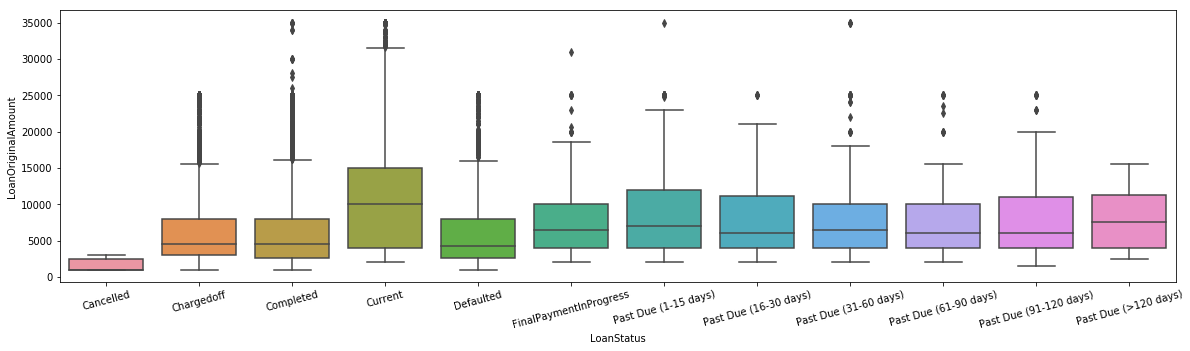

In [35]:
#LoanOriginalAmount vs LoanStatus
plt.figure(figsize = [20, 5])
sb.boxplot(data=loan, y='LoanOriginalAmount', x='LoanStatus');
plt.xticks(rotation=15);

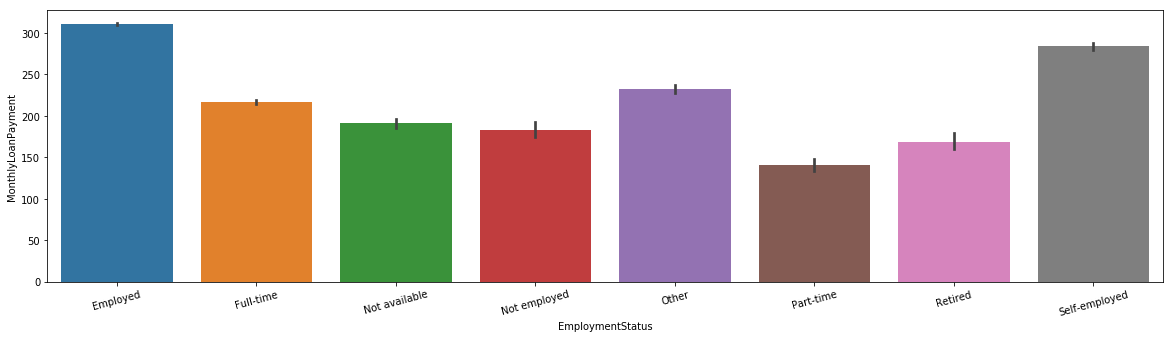

In [36]:
#MonthlyLoanPayment vs EmploymentStatus
plt.figure(figsize = [20, 5])
sb.barplot(data=loan,y='MonthlyLoanPayment',x='EmploymentStatus');
plt.xticks(rotation=15);

Borrowers who are employed and self employed payed most of thier loans monthly.

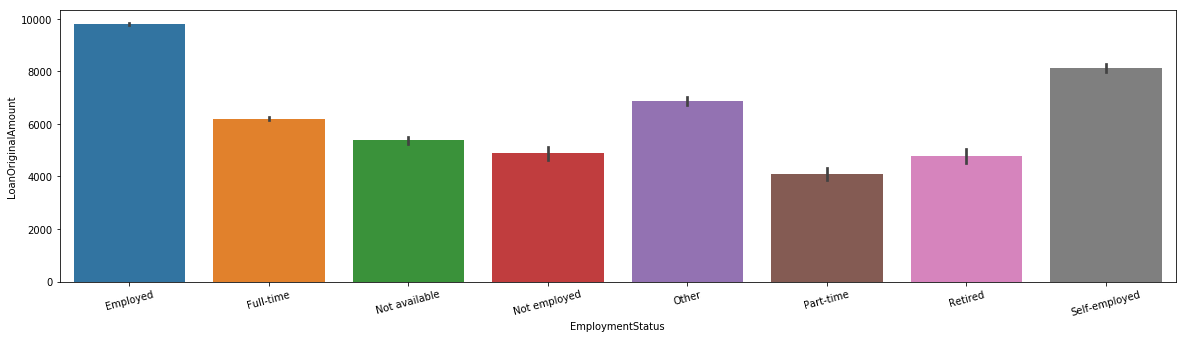

In [37]:
#LoanOriginalAmount vs EmploymentStatus
plt.figure(figsize = [20, 5])
sb.barplot(data=loan,y='LoanOriginalAmount',x='EmploymentStatus');
plt.xticks(rotation=15);

Borrowers who are employed and self employed received huge loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the relation between Recommenders and LoanOriginalAmount, those with higher recommenders received huge loan amounts. However, there is an exception since those with 14 recommenders received huger amounts than those with 16, 18 and 19 recommenders. Those who are employed and self-employed also received huge amounts of loan and there was an exception there too. The Not Available and Retired employment statutes received more loans than those working part time. The inital expection of borrowers with high recommendations and the working class receiving more loans has been disproved.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relation between Employment Status and MonthlyLoanPayment is an interesting one. The Employed and Self Employed workers payed most the loans monthly. However, the Retired payed more loans than those working part-time

## Multivariate Exploration

Investigating three or more variables at once to draw further insights

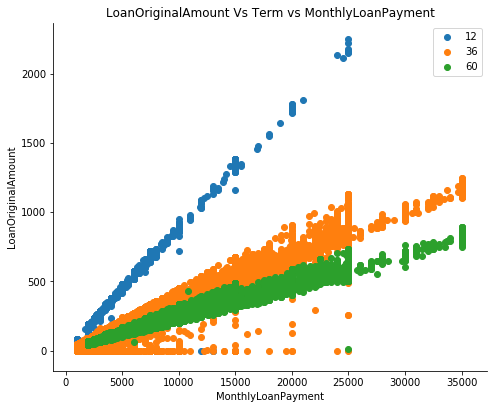

In [45]:
#LoanOriginalAmount vs LoanStatus vs EmploymentStatus 
g=sb.FacetGrid(data=loan, hue="Term", size= 4)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment');
plt.title('LoanOriginalAmount Vs Term vs MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount');
plt.xticks(rotation = 0)
plt.legend();
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(8, 6);

There is a positive correlation between LoanOriginalAmount, MonthlyLoanPayment and Term

In [35]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
Term                  113937 non-null category
LoanStatus            113937 non-null category
BorrowerState         108422 non-null category
Occupation            110349 non-null category
EmploymentStatus      111682 non-null category
LoanOriginalAmount    113937 non-null int64
Recommendations       113937 non-null category
MonthlyLoanPayment    113937 non-null float64
Investors             113937 non-null category
dtypes: category(7), float64(1), int64(1)
memory usage: 2.6 MB


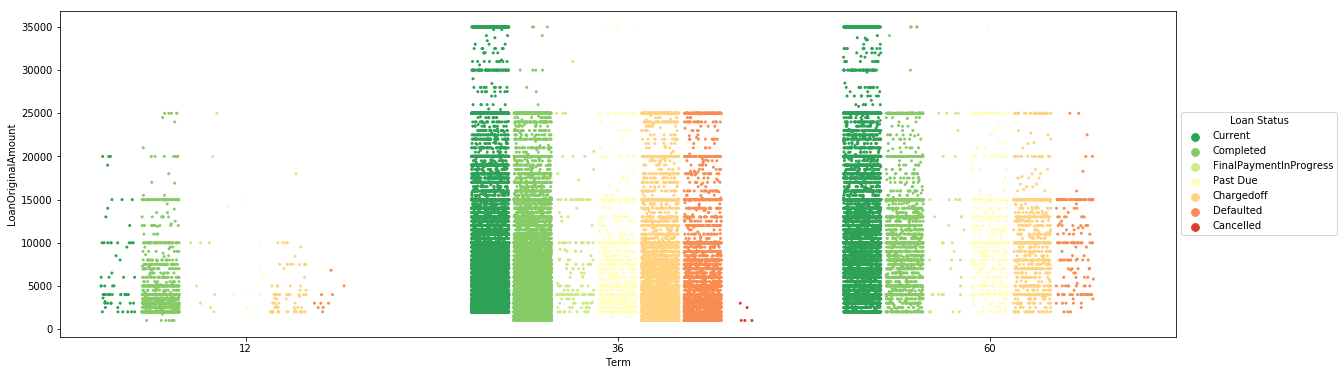

In [47]:
#adding a new column called and changing datatype to string
loan['LoanStatus_New']= loan['LoanStatus'].astype(str)
mask = loan['LoanStatus_New'].str.contains('Past Due')

#for all True rows,change value to 'Past Due'
loan.loc[mask,'LoanStatus_New'] = "Past Due"
status_order=['Current','Completed','FinalPaymentInProgress','Past Due','Chargedoff','Defaulted','Cancelled']
loan['LoanStatus_New'] = pd.Categorical(loan['LoanStatus_New'],status_order,ordered = True)

plt.figure(figsize=[20,6])
sb.stripplot(x='Term',y = 'LoanOriginalAmount', hue= 'LoanStatus_New',data=loan, size=3,jitter=0.35,dodge=True,palette="RdYlGn_r");
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),title='Loan Status');

Loans with longer terms generally have the greatest mean LoanoriginalAmount. For each loan status across the term, is an increasing caterogy. Also we can tell from the graph that 36 term loans are the most frequent.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Taking into consideration Term as a variable of interest, from the barplot, borrowers received huge loans, approximately 13,000 with the highest term of sixty (60). Most of those borrowers too had the 'completed' loan status. Borrowers on the sixty term received huge loan original amounts and have completed payment. 


### Were there any interesting or surprising interactions between features?



I think it interesting that most borrowers with the longest term (Sixty months) have completed their loan or are in the final payment stage. There is also a positive correlation between LoanOriginalAmount, MonthlyLoanPayment and Term. Regardless of the Term or OriginalLoanAmount, borrowers were paying their loans monthly. 